# <span style="color: red;">Week 10</span>  

## <span style="color: blue;">Data visualization</span>

- Very important
- Getting information out through a picture

## <span style="color: green;">Package import</span>

In [10]:
import pandas
import seaborn
from matplotlib import pyplot

In [11]:
# this is code to tell the computer to display things in high resolution since the base is low resolution
%config InlineBackend.figure_format = 'retina'

In [12]:
#create plots on white background and add grid if appropriate
seaborn.set_style('whitegrid')

## <span style="color: green;">Data import</span>


In [13]:
df = pandas.read_csv('heart_failure.csv')

In [14]:
# show size of df
df.shape

(299, 13)

In [15]:
# show the first 5 rows of the df
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,No,582,No,20,Yes,265000.00,1.9,130,Male,No,4,Yes
1,55.0,No,7861,No,38,No,263358.03,1.1,136,Male,No,6,Yes
2,65.0,No,146,No,20,No,162000.00,1.3,129,Male,Yes,7,Yes
3,50.0,Yes,111,No,20,No,210000.00,1.9,137,Male,No,7,Yes
4,65.0,Yes,160,Yes,20,No,327000.00,2.7,116,Female,No,8,Yes


## <span style="color: mediumpurple;">Summary statistics</span>

In [16]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'hypertension', 'platelets', 'serum_creatinine',
       'serum_sodium', 'sex', 'smoking', 'time', 'death'],
      dtype='object')

In [17]:
# create summary statistics for age column
df['age'].describe()

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

In [18]:
# create summary statistics of age for those who survived vs those who died
df.groupby('death').age.describe()

,count,mean,std,min,25%,50%,75%,max
death,,,,,,,,
No,203.0,58.761906,10.637890,40.0,50.0,60.0,65.0,90.0
Yes,96.0,65.215281,13.214556,42.0,55.0,65.0,75.0,95.0


In [19]:
# frequency table of death versus diabetes
df.groupby('death').diabetes.value_counts() 

death  diabetes
No     No          118
       Yes          85
Yes    No           56
       Yes          40
Name: count, dtype: int64

# <span style="color: mediumpurple;">Data visualization</span>

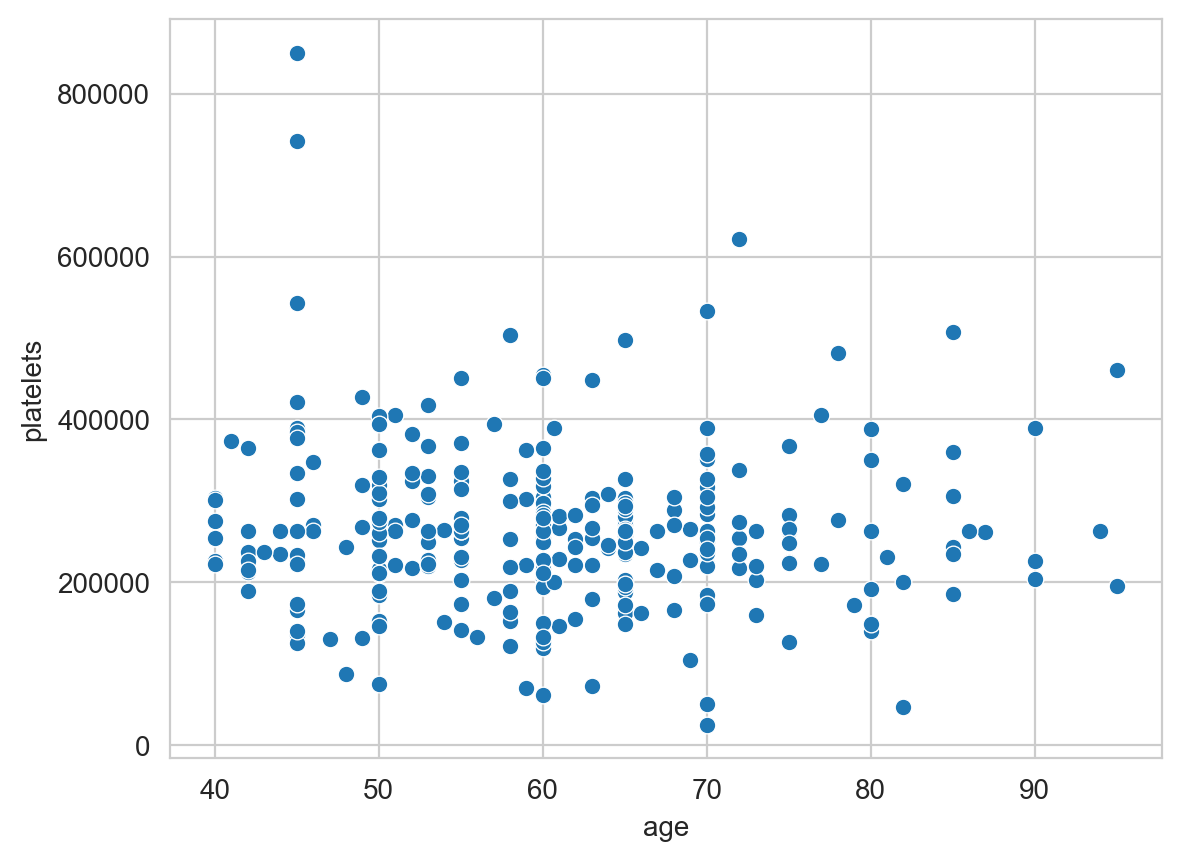

In [20]:
# scatterplot of age versus platelets, adding ; gets rid of the text above the plot
seaborn.scatterplot(data=df, x='age', y='platelets');

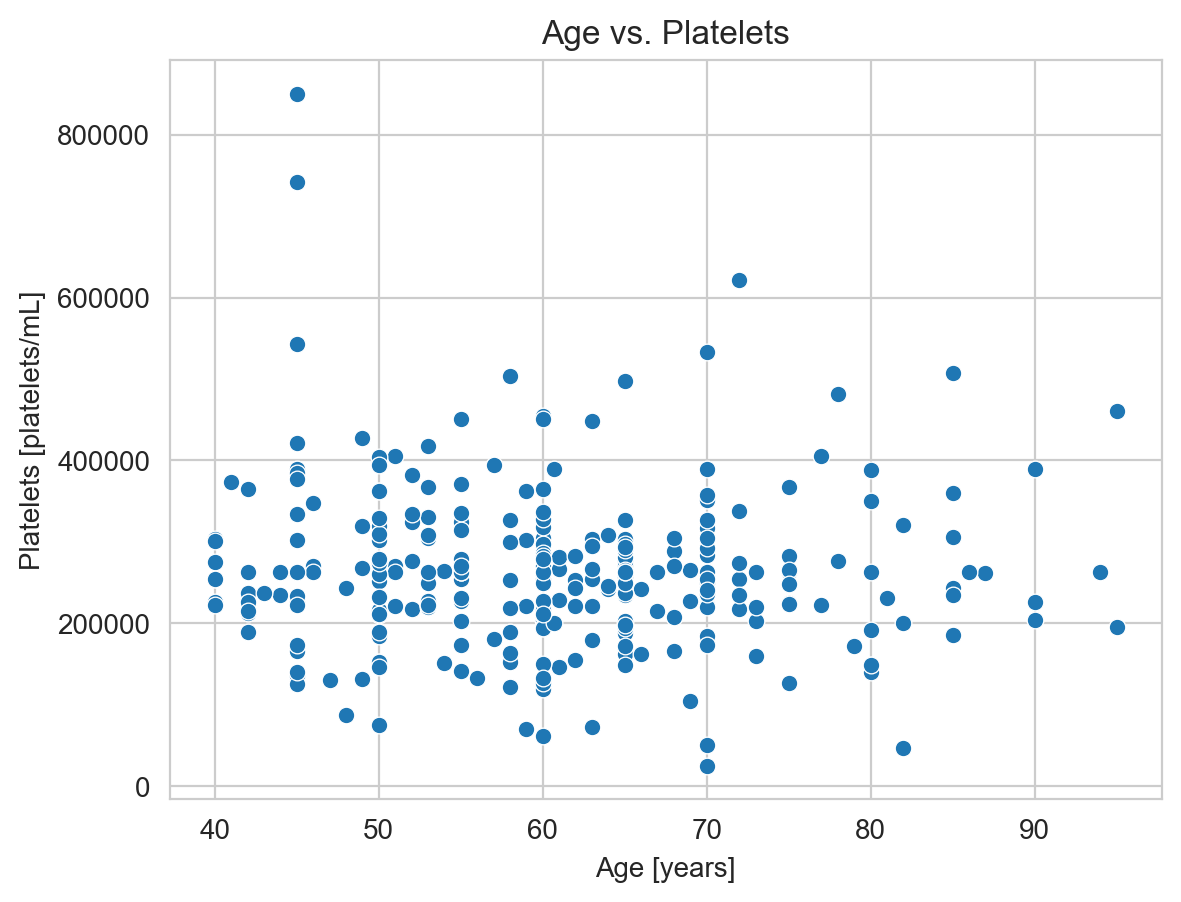

In [21]:
# scatterplot of age versus platelets, adding ; gets rid of the text above the plot add title of Age vs Platelets and make axis labels: Age and Platelets
seaborn.scatterplot(data=df, x='age', y='platelets')
pyplot.title('Age vs. Platelets')
pyplot.xlabel('Age [years]')
pyplot.ylabel('Platelets [platelets/mL]');

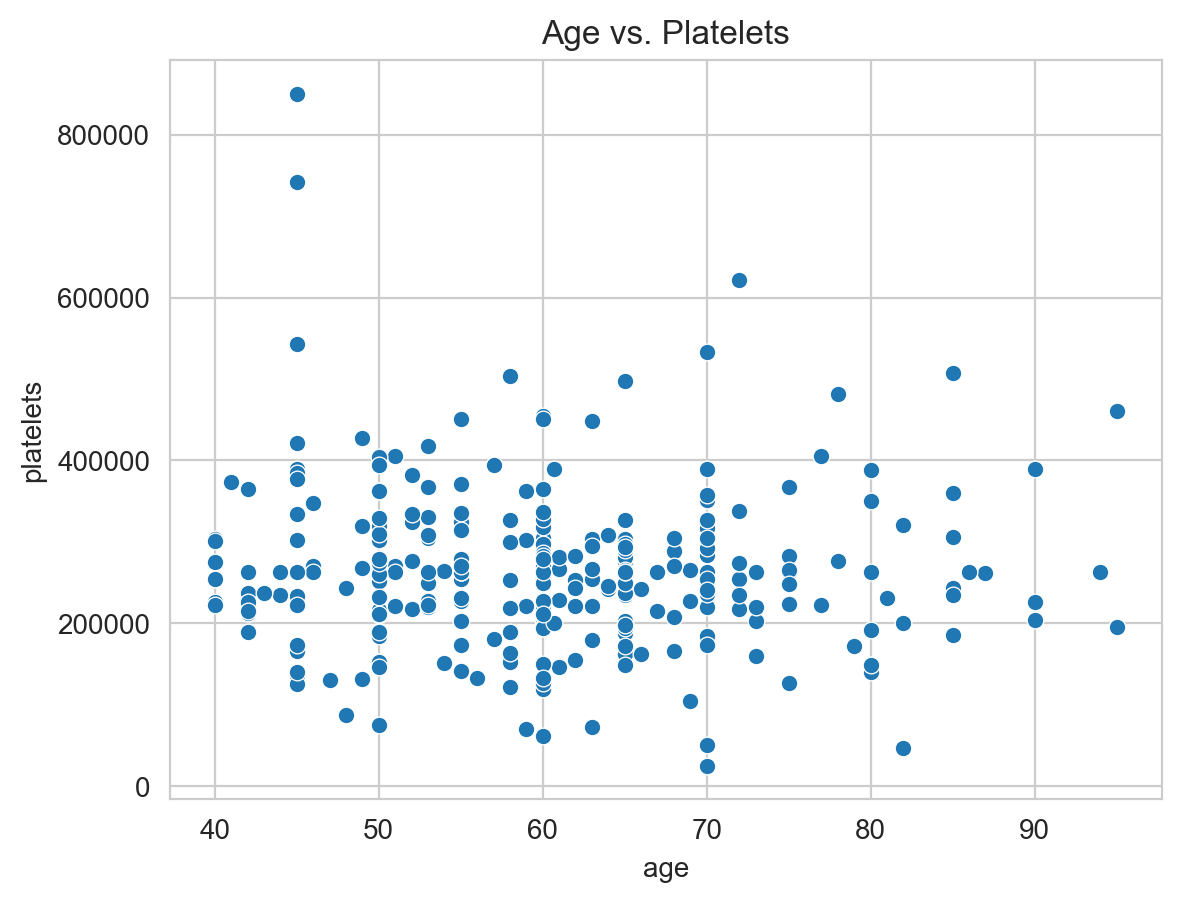

In [22]:
#another way to do it without pyplot
seaborn.scatterplot(
    data=df,
    x='age',
    y='platelets',
).set(title='Age vs. Platelets');

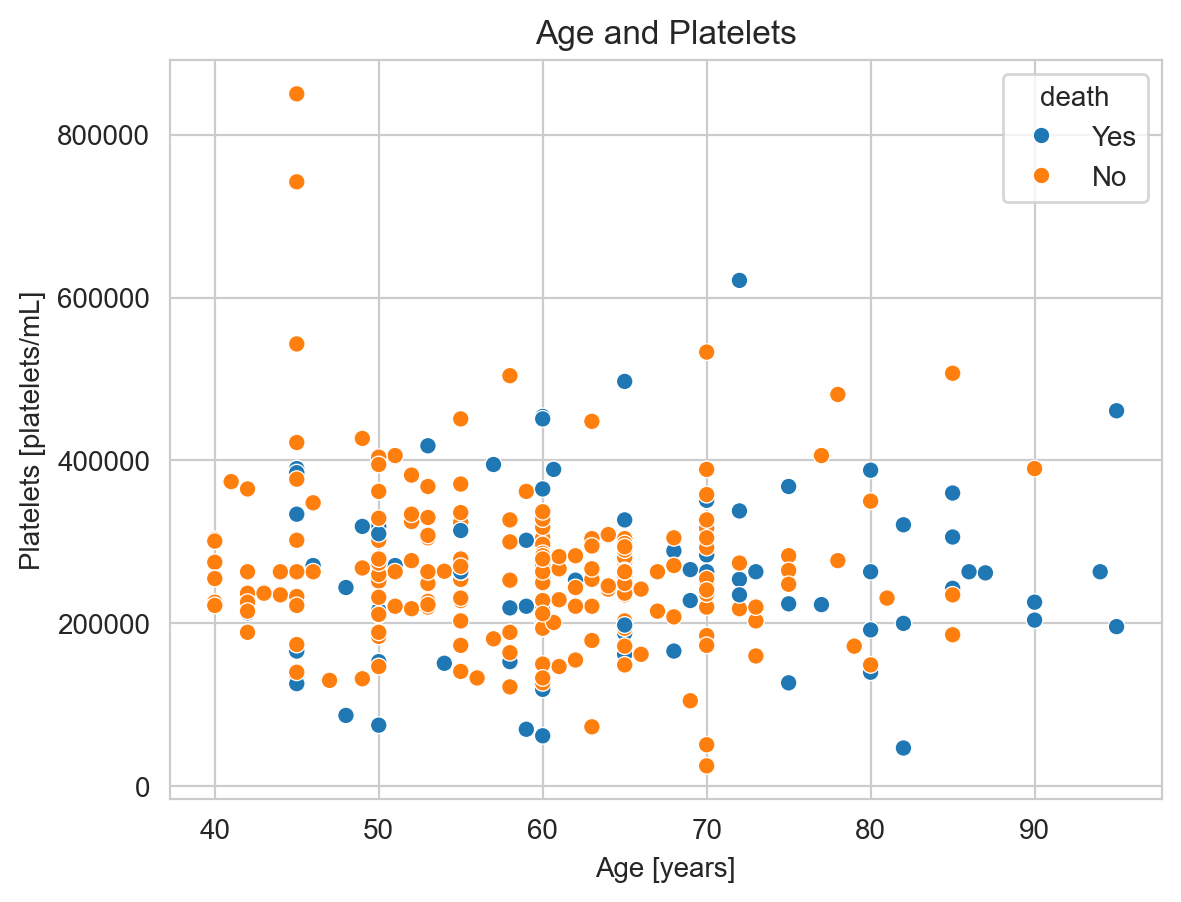

In [23]:
# recreate the same plot but add hue to color by death
seaborn.scatterplot(
    data=df,
    x='age',
    y='platelets',
    hue='death'
).set(title = 'Age and Platelets',
      xlabel = 'Age [years]',
      ylabel = 'Platelets [platelets/mL]'
);

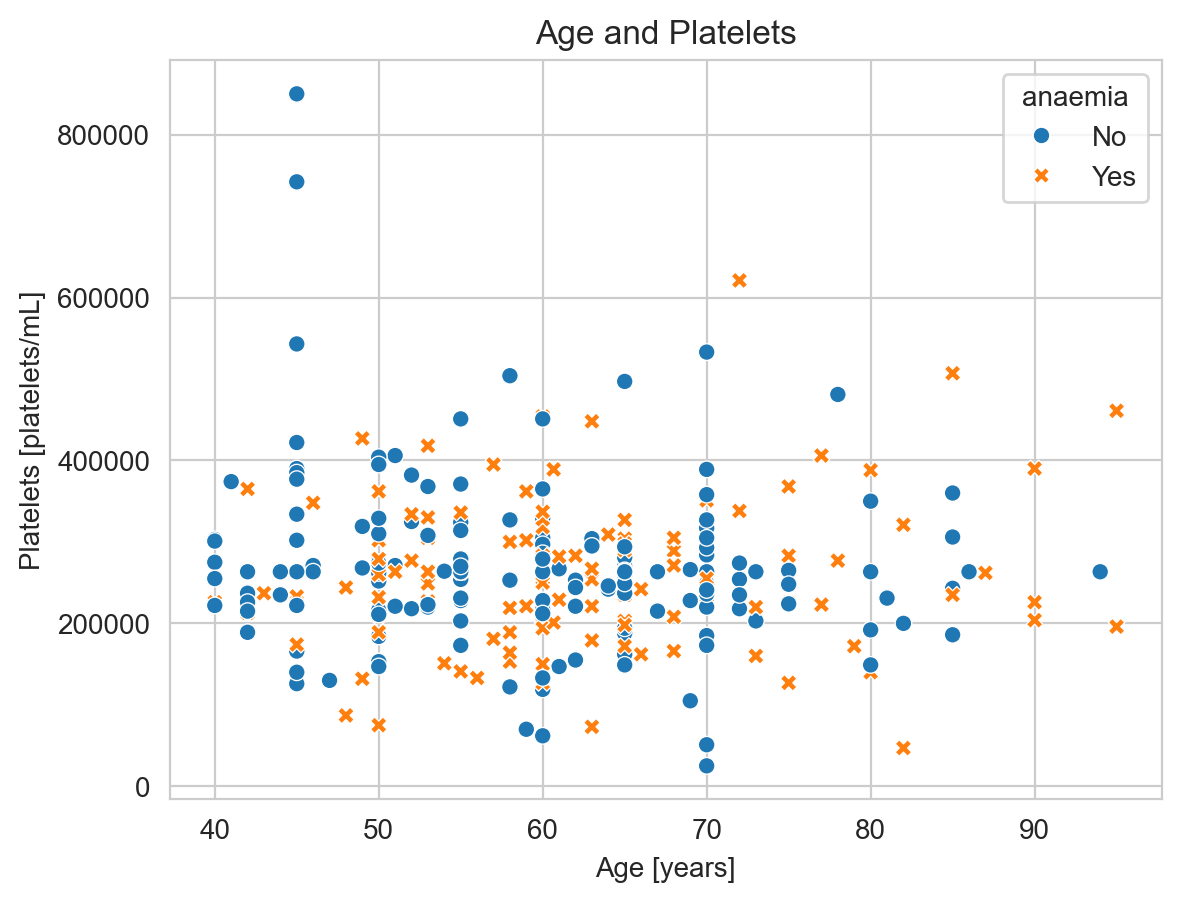

In [24]:
seaborn.scatterplot(
    data=df,
    x='age',
    y='platelets',
    hue='anaemia',
    style='anaemia'
).set(
    title='Age and Platelets',
    xlabel='Age [years]',
    ylabel='Platelets [platelets/mL]'
);

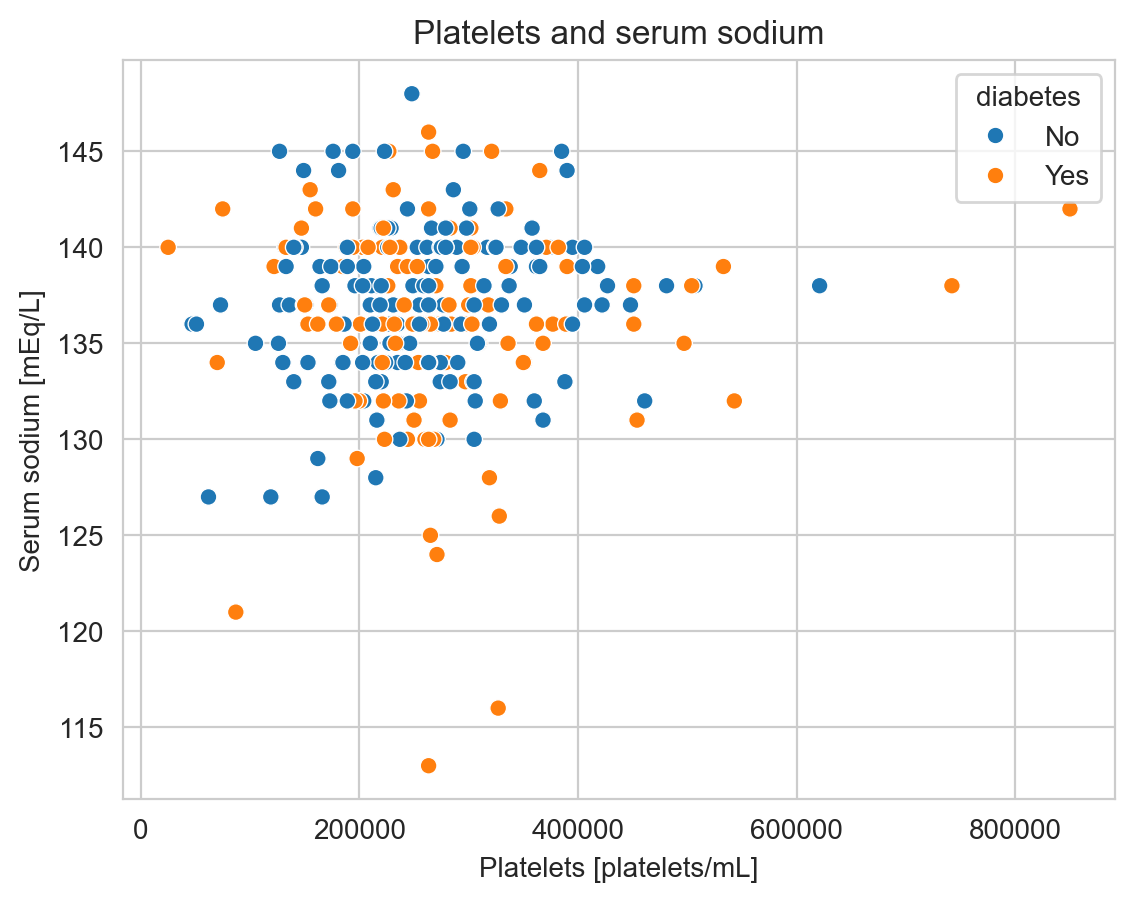

In [25]:
seaborn.scatterplot(
    data=df,
    x='platelets',
    y='serum_sodium',
    hue='diabetes'
).set(
    title='Platelets and serum sodium',
    xlabel='Platelets [platelets/mL]',
    ylabel='Serum sodium [mEq/L]'
);

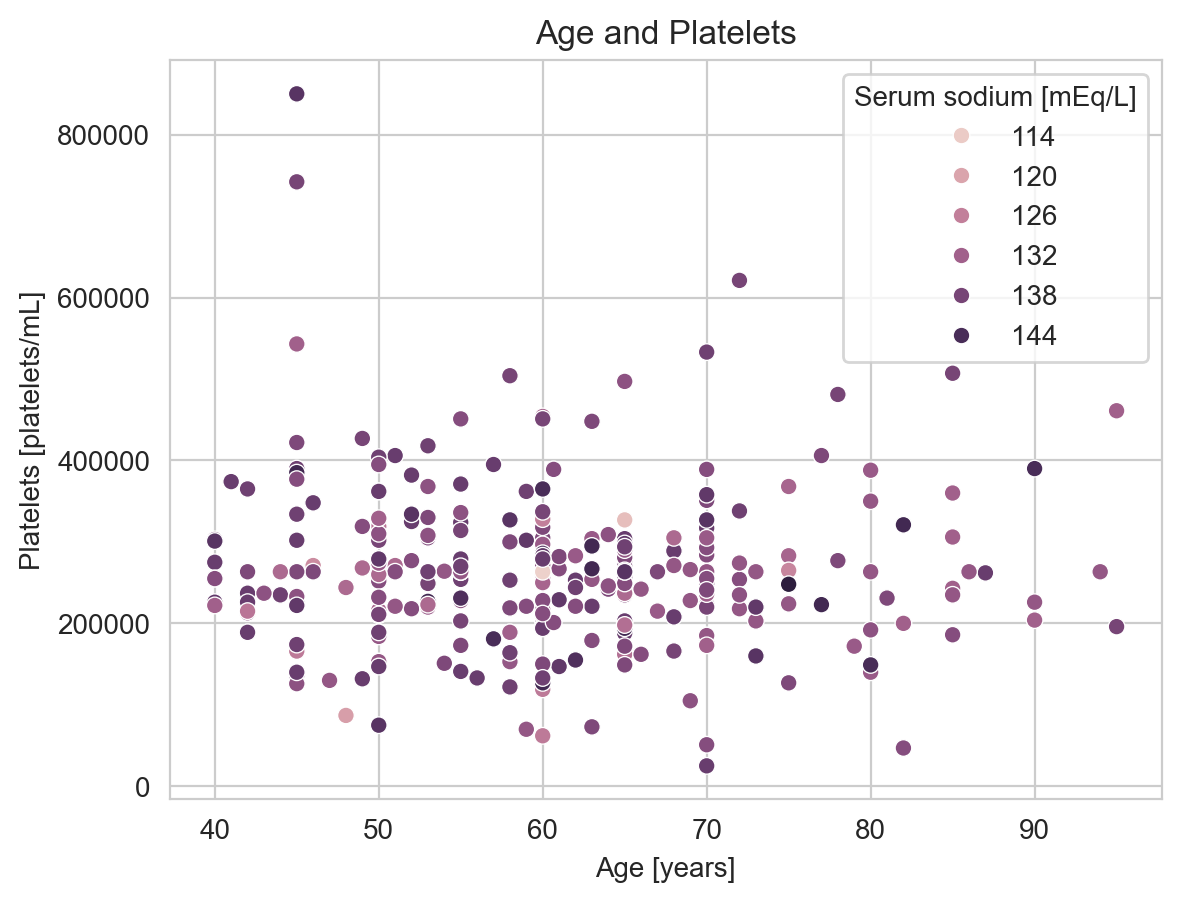

In [26]:
seaborn.scatterplot(
    data=df,
    x='age',
    y='platelets',
    hue='serum_sodium'
).set(
    title='Age and Platelets',
    xlabel='Age [years]',
    ylabel='Platelets [platelets/mL]'
)

pyplot.legend(
    title='Serum sodium [mEq/L]',
);

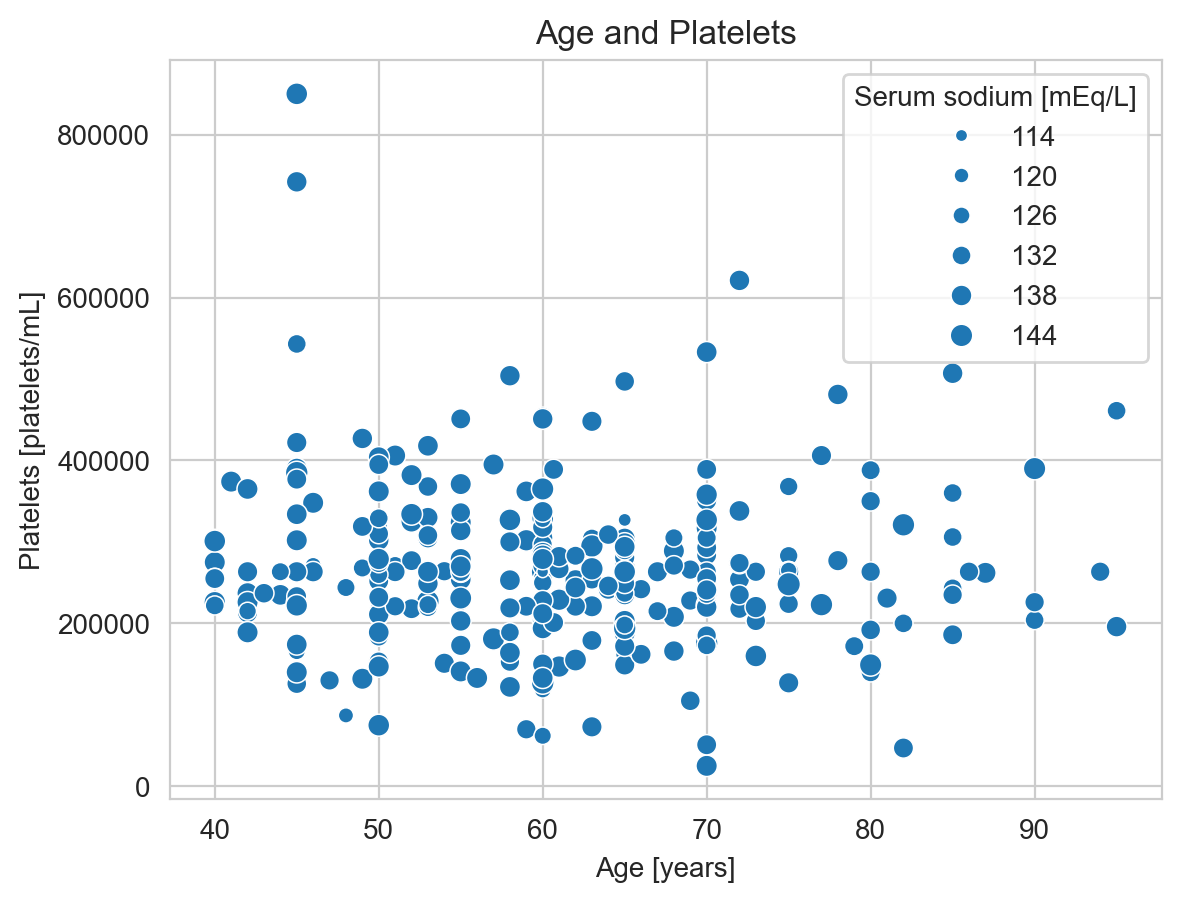

In [27]:
seaborn.scatterplot(
    data=df,
    x='age',
    y='platelets',
    size='serum_sodium'
).set(
    title='Age and Platelets',
    xlabel='Age [years]',
    ylabel='Platelets [platelets/mL]'
)

pyplot.legend(
    title='Serum sodium [mEq/L]'
);

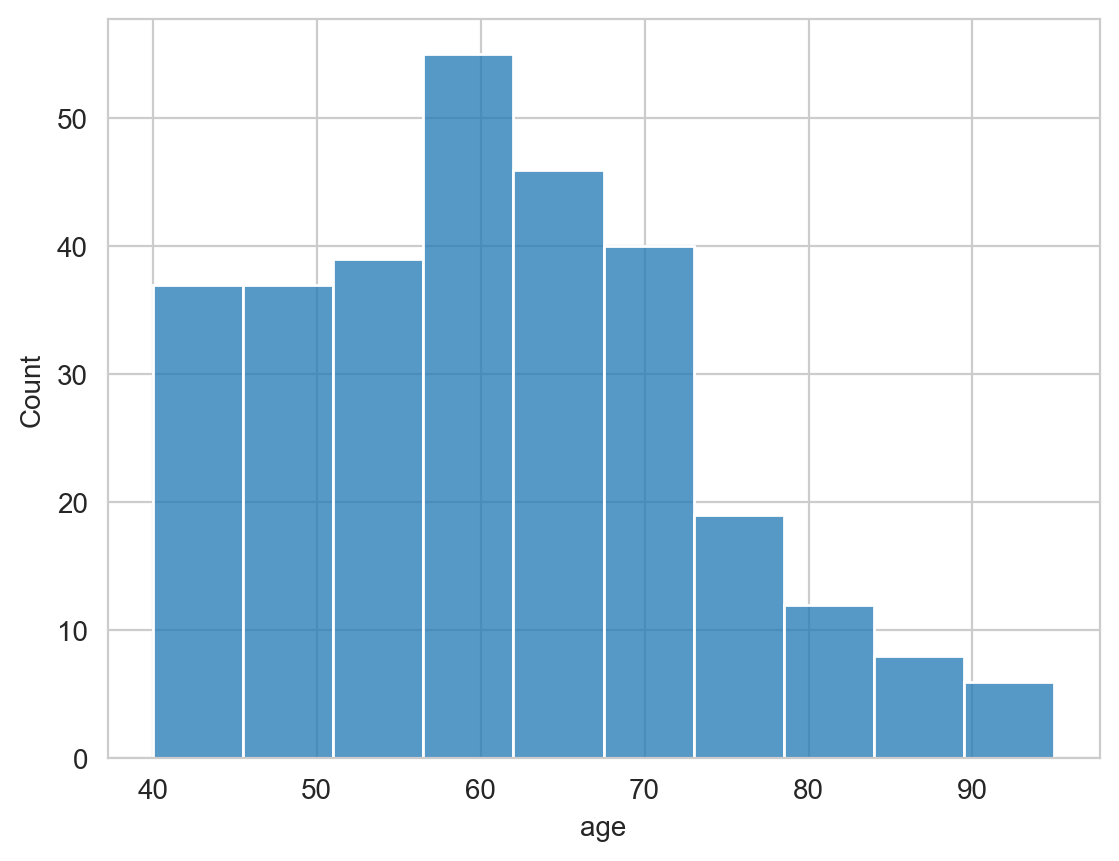

In [28]:
# use seaborn to create a plot of the age column
seaborn.histplot(data=df, x='age');

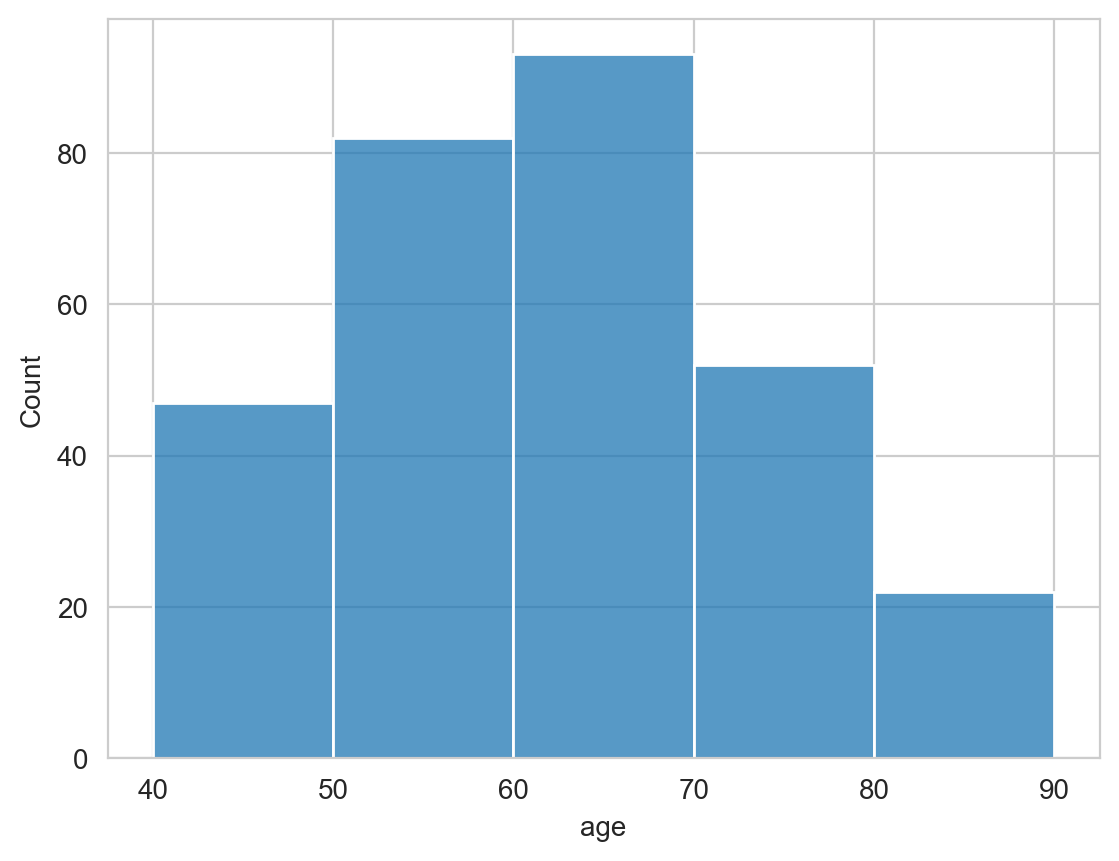

In [29]:
# recreate the same plot but make bins every 10 years starting at 40
seaborn.histplot(data=df, x='age', bins=range(40, 100, 10));

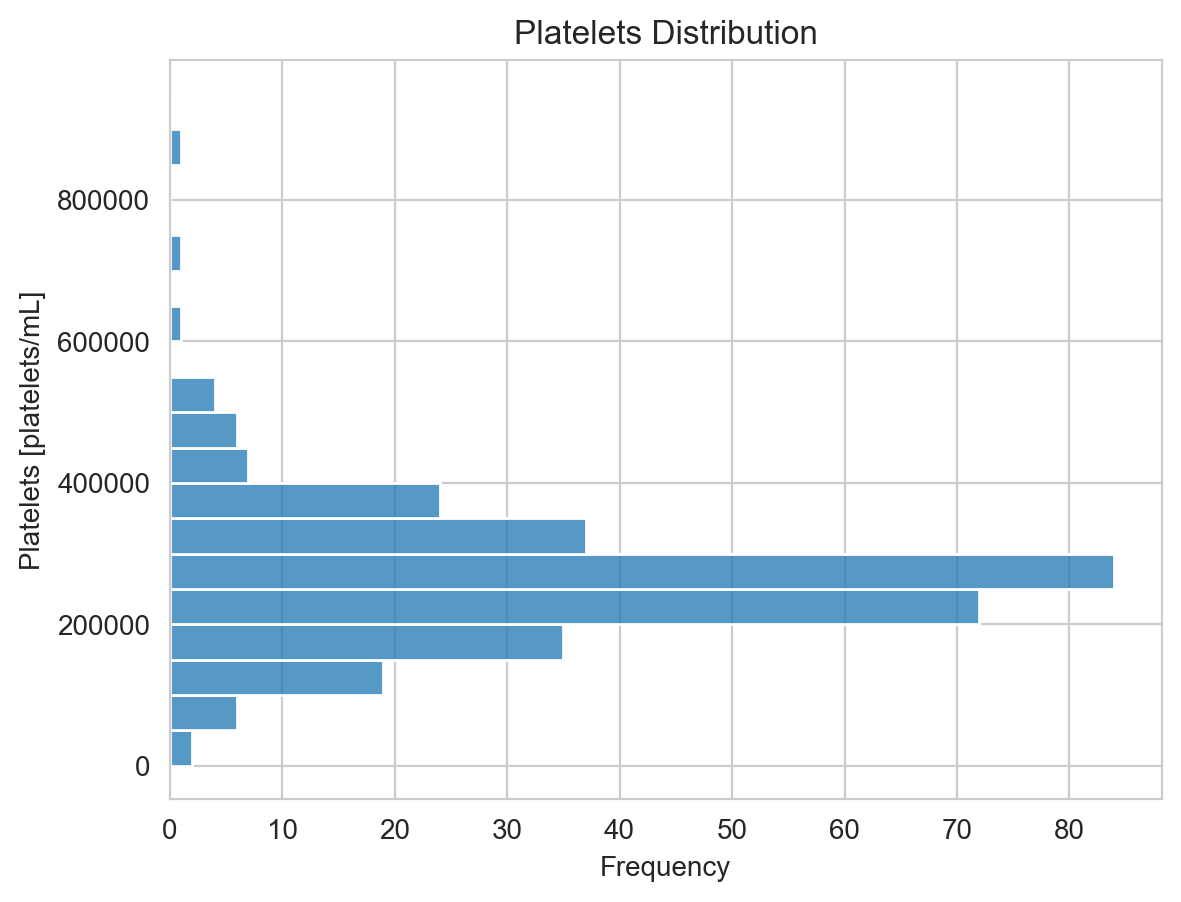

In [31]:
# create a horziontal histogram of the 'platelets' column
# for the bins, start at 0 and increment in steps of 50000
# Add the title "Platelets Distribution"
# Add the horizontal label "Frequency"
# Add the vertical label "Platelets [platelets/mL]"
seaborn.histplot(data=df, y='platelets', bins=range(0, 1000000, 50000)).set(title='Platelets Distribution',
                                                                           ylabel='Platelets [platelets/mL]',
                                                                           xlabel='Frequency');

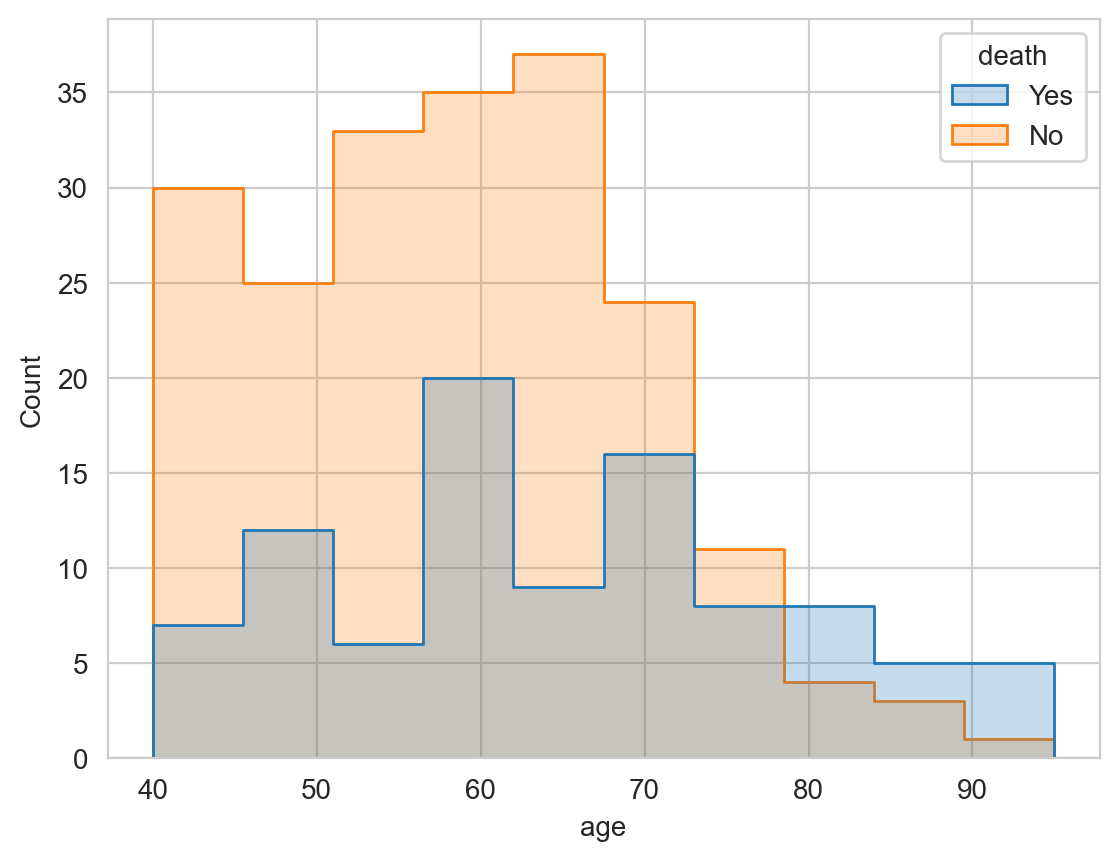

In [8]:
# create a vertical histogram of the age column for each category of death
seaborn.histplot(data=df, x='age', hue='death', element='step');

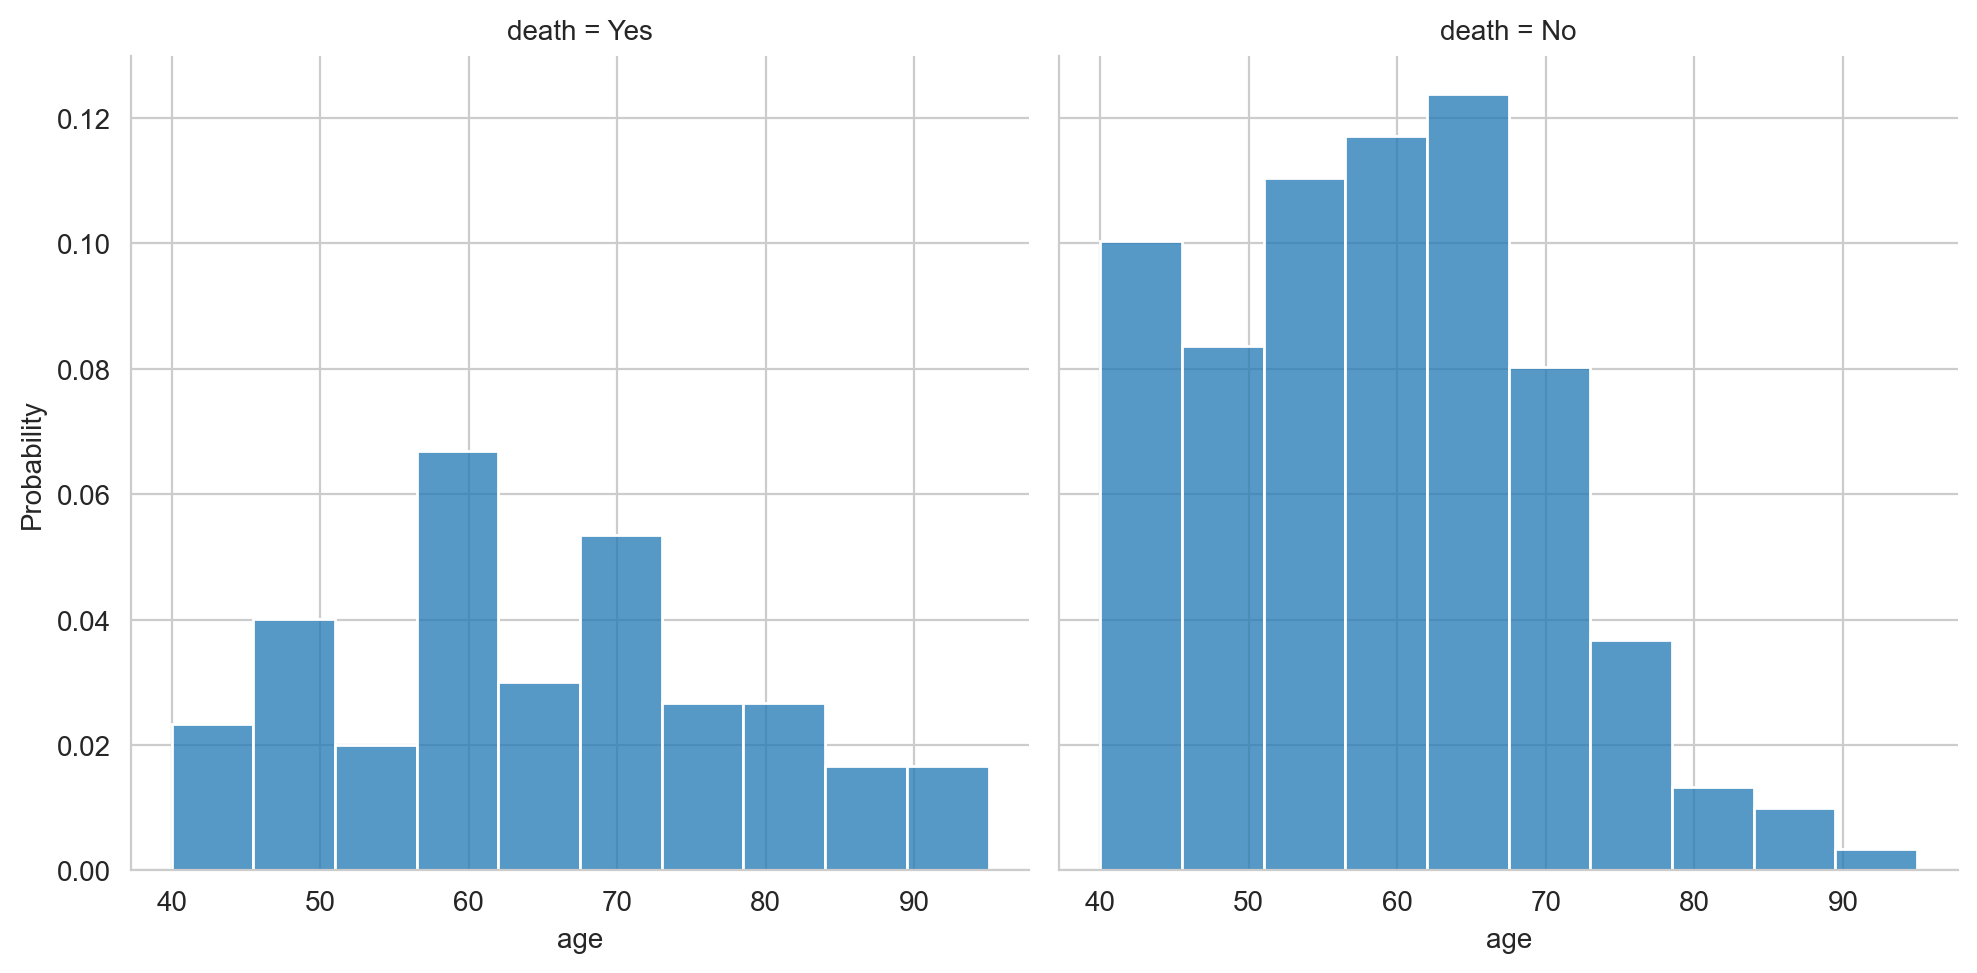

In [9]:
# show the distribution of age of each death category as a histogram using displot and col argument
seaborn.displot(data=df, x='age', col='death', stat='probability');



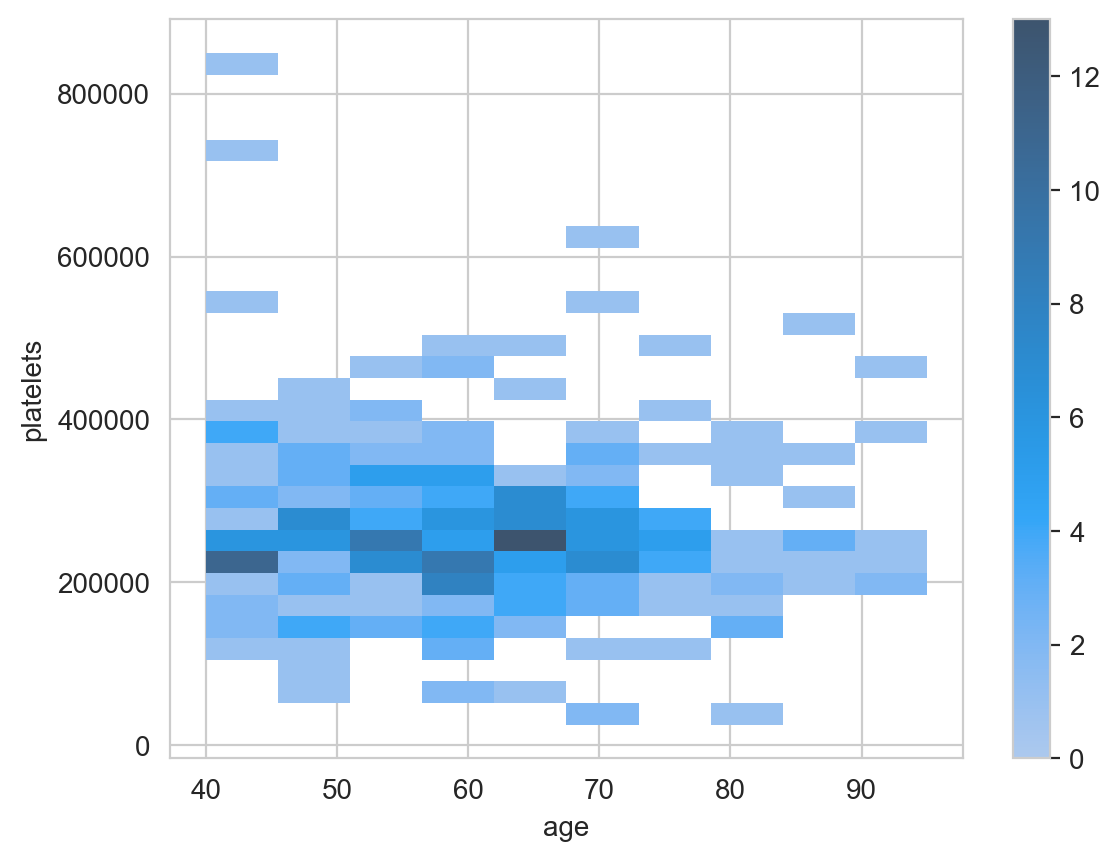

In [32]:
# create a heat map comparing age and platelets
# add a color bar to the heat map
seaborn.histplot(data=df, x='age', y='platelets', cbar=True);

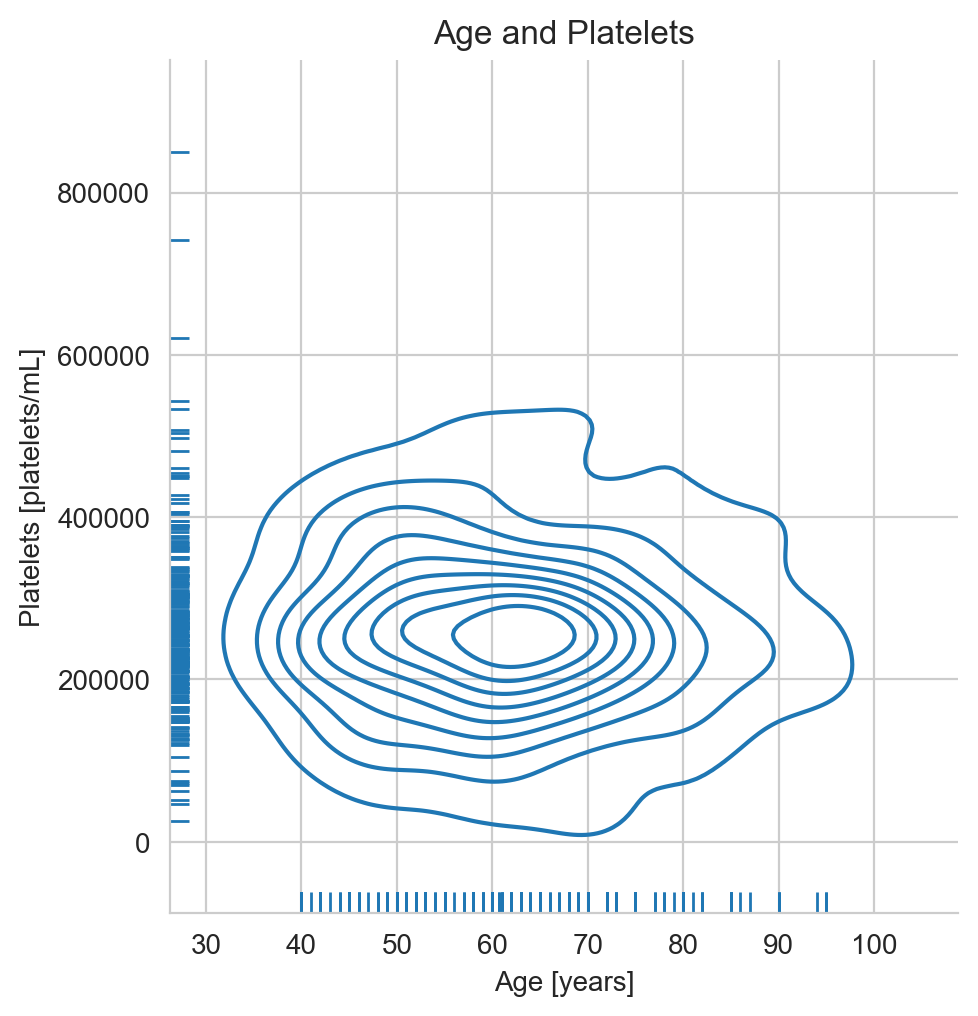

In [33]:
seaborn.displot(
    df,
    x='age',
    y='platelets',
    kind='kde',
    rug=True
).set(
    title='Age and Platelets',
    xlabel='Age [years]',
    ylabel='Platelets [platelets/mL]'
);

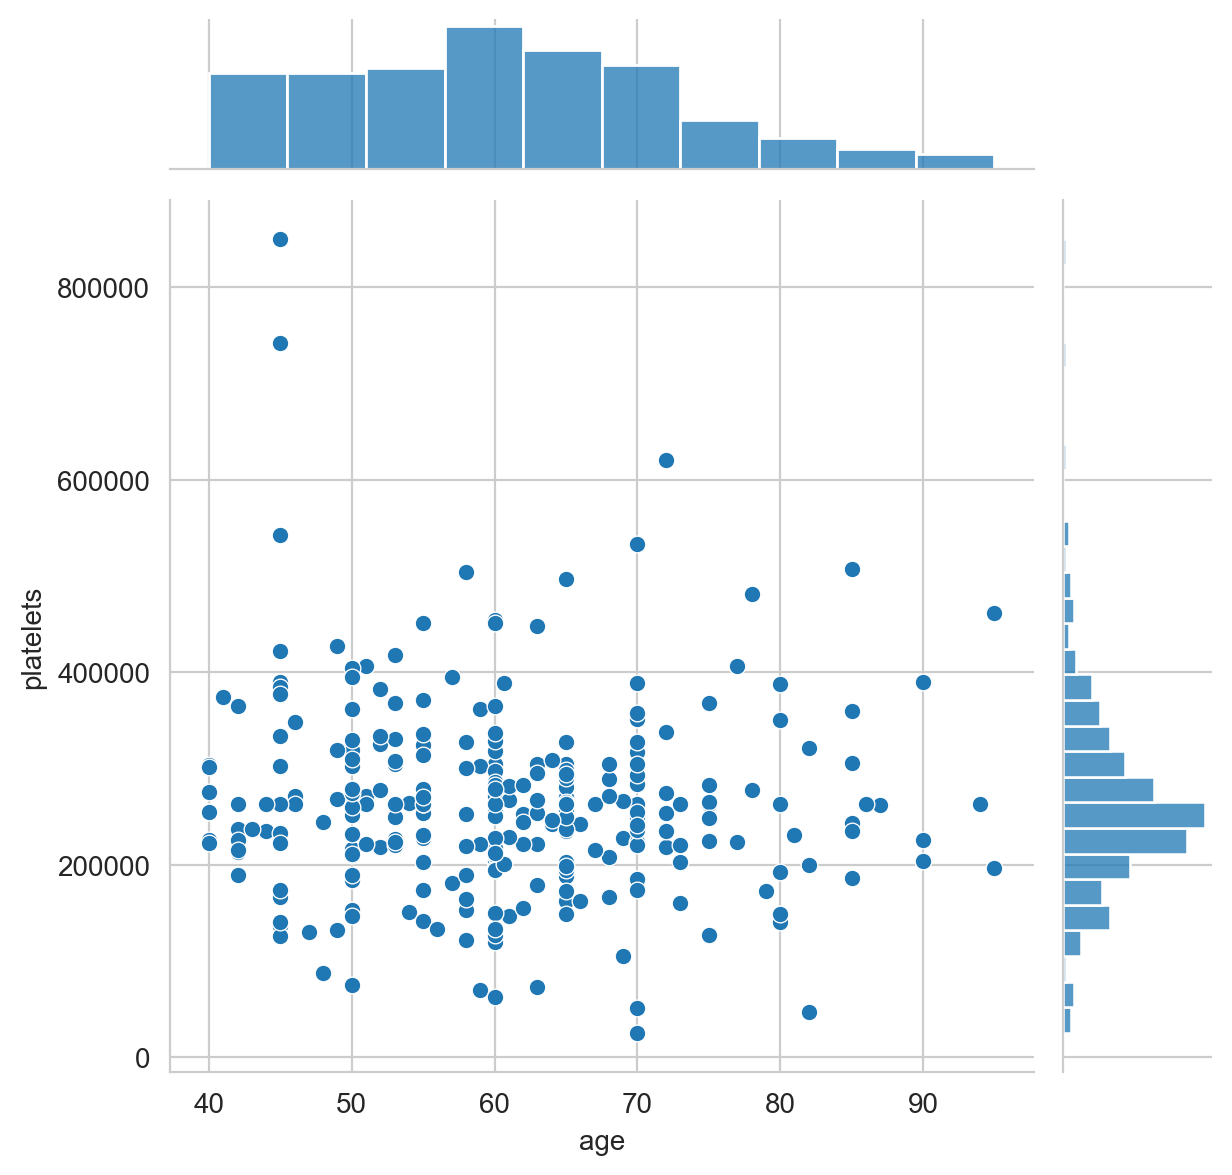

In [34]:
seaborn.jointplot(
    df,
    x='age',
    y='platelets'
);

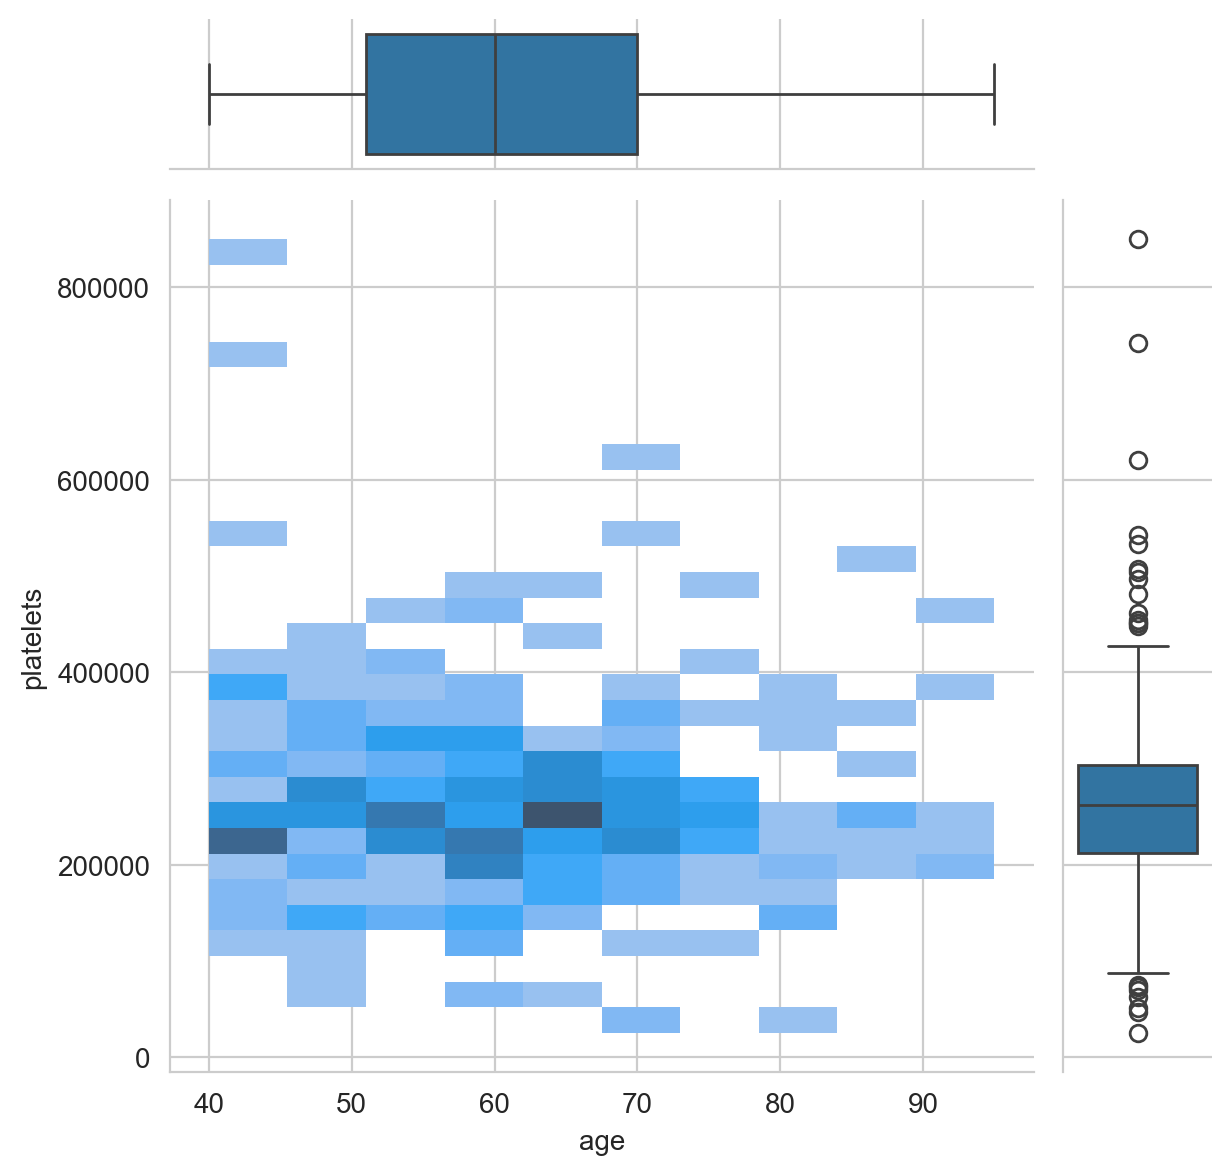

In [35]:
g = seaborn.JointGrid(
    data=df,
    x='age',
    y='platelets'
)
g.plot_joint(seaborn.histplot)
g.plot_marginals(seaborn.boxplot);

In [53]:
# create a box and whisker plot of the age column for each category of death
seaborn.boxplot(data=df, x='death', y='age');

In [56]:
# do a student's t test (using the scipy stats module) to compare the age of the no and yes categories of death
from scipy import stats
no = df[df.death == 'No'].age
yes = df[df.death == 'Yes'].age
stats.ttest_ind(no, yes)

In [51]:
seaborn.catplot(
    data=df,
    x='diabetes',
    y='age',
    kind='box'
).set(
    title='Age and Diabetes',
    xlabel='Diabetes',
    ylabel='Age [years]'
);

In [52]:
seaborn.catplot(
    data=df,
    x='diabetes',
    y='age',
    hue='death',
    kind='box'
).set(
    title='Age and Diabetes by Survival Group',
    xlabel='Diabetes',
    ylabel='Age [years]'
);

# <span style="color: violet;">Quiz Questions</span>


1. How do you import the Seaborn package in Python?

- import seaborn OR import seaborn as sns

2. How do you create a scatter plot in Seaborn for variables x and y in a DataFrame df?

- sns.scatterplot(data=df, x="x", y="y")

3. How do you create a line plot in Seaborn for variables x and y in a DataFrame df?

- sns.lineplot(data=df, x="x", y="y")

4. How do you create a histogram in Seaborn for a variable x in a DataFrame df?

- sns.histplot(data=df, x ="x")

5. How do you create a stacked histogram in Seaborn for variables x and 'hue' y in a DataFrame df?

- sns.histplot(data=df, x="x", hue="y", multiple="stack")

6. How do you create a heatmap in Seaborn for a variable x and y in a DataFrame df?

- sns.heatmap(df, x='x', y='y')

7. How do you create a box plot in Seaborn for variables x and y in a DataFrame df?

- sns.boxplot(data=df, x='x', y='y')

8. How do you create a violin plot in Seaborn for variables x and y in a DataFrame df?

- sns.violinplot(data=df, x='x', y='y')

9. How do you create a bar plot in Seaborn for variables x and y in a DataFrame df?

- sns.barplot(data=df, x='x', y='y')

10. How do you add a title to a Seaborn plot assigned to the variable ax with the title 'My Title'?

- ax.set_title('My Title')

11. How do you save a Seaborn plot ax to a file named 'output.png'?

- ax.get_figure().savefig('output.png')

12. How do you set the x and y axis labels to 'X Label' and 'Y Label' respectively for a Seaborn plot ax?

- ax.set(xlabel='X Label', ylabel='Y Label')

13. How do you change the color palette of a Seaborn plot to 'Blues'?

- sns.set_palette('Blues')

14. How do you display a Seaborn plot with a logarithmic scale on the y-axis?

- ax.set_yscale('log')

15. How do you add a regression line to a scatter plot in Seaborn for variables x and y in a DataFrame df?

- sns.regplot(data=df, x='x', y='y'